In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import os

## Read in data from loops

directory_path = r'C:\Users\mrpro\Documents\Code\CBI\Corrected_Data_Official\nesscanResult_removedBadNesdisRecords\PortIsabel'
dataframes = []


for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('.csv'):

        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(
        file_path,
        parse_dates=[0],
        na_values=[-999, -99, 99, 'NA', 'RM'],
        engine='python'   
        )
        df.columns = ['station #','date', 'pwl',]
        dataframes.append(df)

pi = pd.concat(dataframes, ignore_index=True)

directory_path = r'C:\Users\mrpro\Documents\Code\CBI\data 2\NOAA\portIsabel'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

#formats the dataframes
pi_NOAA = pd.concat(dataframes, ignore_index=True)
pi_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
pi_NOAA.reset_index(drop = True, inplace=True)
pi['date'] = pd.to_datetime(pi['date'])
pi_NOAA['date'] = pd.to_datetime(pi_NOAA['Date Time'],errors='coerce')
pi = pi.merge(pi_NOAA,on='date',how='outer')
pi.drop(labels=range(0,2), axis = 0,inplace=True)
pi.reset_index(drop = True, inplace=True)
pi['offset'] = pi['pwl'] - pi[' Water Level']
pi = pi.drop(columns='Date Time', axis= 0)
pi = pi.drop(columns=' Sigma', axis= 0)
pi = pi.drop(columns=' O or I (for verified)', axis= 0)
pi = pi.drop(columns=' F', axis= 0)
pi = pi.drop(columns=' R', axis= 0)
pi = pi.drop(columns=' L', axis= 0)
pi = pi.drop(columns=' Quality ', axis= 0)

In [3]:

df = pd.DataFrame({
    'values': pi['offset'],
    'date': pi['date']
})

# Convert column to numpy array
offset_list = df['values'].to_numpy()
date_list = df['date'].to_numpy()  # Extract dates as numpy array

def consecutive_runs_info(arr):
    if len(arr) == 0:
        return []

    runs = []
    
    def same_value(a, b):
        return (np.isnan(a) and np.isnan(b)) or (a == b)

    start_idx = 0
    current_val = arr[0]

    for i in range(1, len(arr)):
        if not same_value(arr[i], current_val):
            runs.append((start_idx, i, current_val, i - start_idx))
            start_idx = i
            current_val = arr[i]

    runs.append((start_idx, len(arr), current_val, len(arr) - start_idx))
    return runs

arr = offset_list
arr_rounded = np.round(arr, 3)  # Round values for stability
info = consecutive_runs_info(arr_rounded)

# Filter results and add start/end dates
filtered_info = []
for (start_idx, end_idx, val, length) in info:
    if not np.isnan(val) and val != 0 and length >= 10:
        start_date = date_list[start_idx]  # Get start date
        end_date = date_list[end_idx - 1]  # Get end date (exclusive index)
        filtered_info.append((start_idx, end_idx, val, length, start_date, end_date))

# Convert to DataFrame and copy to clipboard
df_filtered = pd.DataFrame(filtered_info, columns=['Start Index', 'End Index', 'Value', 'Length', 'Start Date', 'End Date'])
df_filtered.to_clipboard(index=False)

print(df_filtered)


     Start Index  End Index  Value  Length          Start Date  \
0         966806     966816 -0.003      10 2001-09-26 04:00:00   
1         966856     990375 -0.003   23519 2001-09-26 09:00:00   
2         990905     992185 -0.003    1280 2002-01-04 12:00:00   
3        1849179    1849354  0.121     175 2011-10-19 19:30:00   
4        1849411    1849458  0.001      47 2011-10-20 18:42:00   
..           ...        ...    ...     ...                 ...   
366      2793087    2793287 -0.002     200 2022-07-26 18:06:00   
367      2850919    2850933  0.004      14 2023-03-24 17:18:00   
368      2850938    2853774  0.004    2836 2023-03-24 19:12:00   
369      2853777    2853818  0.004      41 2023-04-05 15:06:00   
370      2853821    2854005  0.004     184 2023-04-05 19:30:00   

               End Date  
0   2001-09-26 04:54:00  
1   2002-01-02 06:54:00  
2   2002-01-09 19:54:00  
3   2011-10-20 12:54:00  
4   2011-10-20 23:18:00  
..                  ...  
366 2022-07-27 14:00:00  

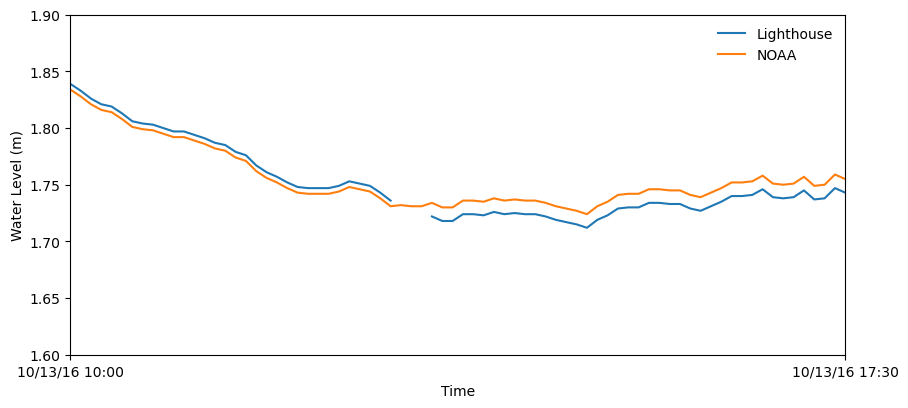

In [41]:

start_date = pd.to_datetime('10/13/16 10:00')
end_date = pd.to_datetime('10/13/16 17:30')

# Filter the data to only include the xlim range
filtered_data = pi[(pi['date'] >= start_date) & (pi['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='Lighthouse')
plt.plot(filtered_data['date'], filtered_data[' Water Level'], label='NOAA')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=65))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(1.6,1.9)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

In [34]:
pi[2756368:2756399]

,station #,date,pwl,Water Level,offset
2756368,018,2022-02-23 18:12:00,1.765,1.767,-0.002
2756369,018,2022-02-23 18:18:00,1.766,1.768,-0.002
2756370,018,2022-02-23 18:24:00,1.764,1.766,-0.002
2756371,018,2022-02-23 18:30:00,1.758,1.760,-0.002
2756372,018,2022-02-23 18:36:00,1.757,1.759,-0.002
2756373,018,2022-02-23 18:42:00,1.755,1.757,-0.002
2756374,018,2022-02-23 18:48:00,1.756,1.758,-0.002
2756375,018,2022-02-23 18:54:00,1.757,1.759,-0.002
2756376,018,2022-02-23 19:00:00,1.757,1.759,-0.002
2756377,018,2022-02-23 19:06:00,1.758,1.760,-0.002
